In [1]:
#Import Packages
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report, accuracy_score
from sklearn.metrics import  roc_curve, roc_auc_score
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [2]:
#Read file
df = pd.read_csv('data_cleaned.csv')

In [3]:
#Get data description
df.describe()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,0.699647,0.985866,149.961131,0.318021,0.951943,1.427562,0.639576,1.310954,0.558304
std,9.128186,0.459224,1.031324,22.691625,0.466533,1.026400,0.599246,0.905532,0.579300,0.497469
min,29.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,4.000000,2.000000,3.000000,2.000000,1.000000


In [4]:
#Splitting Data
X = df.drop('target', axis=1)
y = df['target']

In [5]:
#Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2, random_state=42)

# Get amount of data from train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 9)
(57, 9)
(226,)
(57,)


In [7]:
# Get Logistic Regression model
lr = LogisticRegression()

#Several parameters for tuning
param_grid = {
    'max_iter': [100, 200, 300, 400, 500],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

#Use grid search to tuning the model
gs = GridSearchCV(
        estimator= lr,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

#Train logistic regression model
lr_model = gs.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

#Show best parameters and best scores
print(lr_model.best_params_)
print(f"Best Training Accuracy: {lr_model.best_score_}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
#Get Accuracy and classification report
print(classification_report(y_test, y_pred))

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'liblinear'}
Best Training Accuracy: 0.9209805668016194
Test Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [8]:
# Get Random Forest model
rf = RandomForestClassifier()

#Several parameters for tuning
param_grid_rf = {'n_estimators': [100, 200, 300, 500],
               'max_depth': [None, 10, 20, 30, 40, 50],
               'criterion': ['gini', 'entropy']}

#Use grid search to tuning the model
gs1 = GridSearchCV(
        estimator=rf,
        param_grid = param_grid_rf,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

#Train random forest model
rf_model = gs1.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#Show best parameters and best scores
print(rf_model.best_params_)
print(f"Best Training Accuracy: {rf_model.best_score_}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

#Get Accuracy and classification report
print(classification_report(y_test, y_pred))

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 200}
Best Training Accuracy: 0.9091562753036436
Test Accuracy: 0.8245614035087719
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.80      0.90      0.85        31

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57



In [9]:
# Get Decision Tree model
dt = DecisionTreeClassifier()

#Set several parameters for tuning
param_grid_dt = {'min_samples_leaf': [1,2,4],
               'max_depth': [None, '10', '30', '50'],
               'criterion': ['gini', 'entropy']}

#Use grid search to tuning the model
gs2 = GridSearchCV(
        estimator=dt,
        param_grid = param_grid_dt,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

#Train decision tree model
dt_model = gs2.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

#Show best parameters and best scores from tuning
print(dt_model.best_params_)
print(f"Best Training Accuracy: {dt_model.best_score_}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

#Get Accuracy and classification report
print(classification_report(y_test,y_pred))

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4}
Best Training Accuracy: 0.8140574898785425
Test Accuracy: 0.7719298245614035
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       0.85      0.71      0.77        31

    accuracy                           0.77        57
   macro avg       0.78      0.78      0.77        57
weighted avg       0.78      0.77      0.77        57



In [10]:
# Get MLP model
mlp = MLPClassifier()

#Set several parameters for tuning
param_grid_mlp = {'hidden_layer_sizes': [(64,),(64,128),(64, 128, 32)],
               'activation': ['logistic', 'tanh', 'sigmoid'],
               'solver': ['sgd', 'adam' ]}

#Use grid search to tuning the model
gs3 = GridSearchCV(
        estimator=mlp,
        param_grid = param_grid_mlp,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

#Train decision tree model
mlp_model = gs3.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)

#Show best parameters and best scores from tuning
print(mlp_model.best_params_)
print(f"Best Training Accuracy: {mlp_model.best_score_}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

#Get Accuracy and classification report
print(classification_report(y_test,y_pred))


{'activation': 'logistic', 'hidden_layer_sizes': (64,), 'solver': 'adam'}
Best Training Accuracy: 0.9297117408906883
Test Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [11]:
# Predict the probabilities for the positive class
y_pred_logreg = lr_model.predict_proba(X_test)[:,1]
y_pred_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_dt= dt_model.predict_proba(X_test)[:,1]
y_pred_mlp= mlp_model.predict_proba(X_test)[:,1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.879652605459057
AUC-ROC for Random Forest: 0.9112903225806451
AUC-ROC for Decision Tree: 0.8604218362282878
AUC-ROC for MLP: 0.8895781637717122


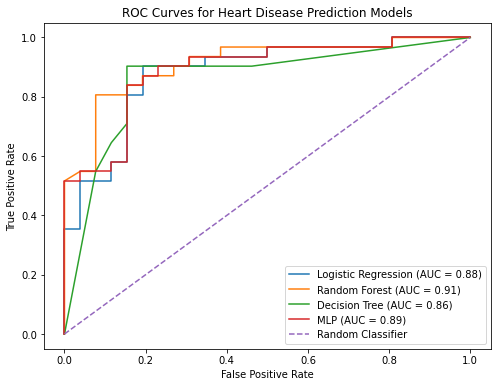

In [12]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0,1],[0,1], linestyle='--', label='Random Classifier')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [13]:
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate Youden's Index
    youden_index = tpr - fpr

    #ambil indeks tresholds terbaik
    optimal_idx = np.argmax(youden_index)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.4246777284072778
Best threshold for Random Forest: 0.67
Best threshold for Decision Tree: 0.3333333333333333
Best threshold for MLP: 0.6312118428478881


In [14]:
# # Saving model
# pklname = 'model.pkl'

# with open(pklname, 'wb') as file:
#     pickle.dump(rf_model,file)